In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time
import TrainingPresets as TP

In [2]:
import model_v01b2 as mymodel

In [3]:
torch.cuda.get_device_name(0)
m1 = mymodel.MyModel().to(torch.device("cuda:1"))
summary(m1, input_size=(2, 90, 100))

Layer (type:depth-idx)                        Output Shape              Param #
MyModel                                       [1, 1, 128, 128]          --
├─MyEncoder: 1-1                              [1, 86, 128]              --
│    └─MyEncodeCNN: 2-1                       --                        3,445,504
│    │    └─Sequential: 3-1                   [1, 16, 30, 98]           160
│    │    └─Sequential: 3-2                   [1, 32, 26, 94]           12,832
│    │    └─Sequential: 3-3                   [1, 64, 22, 90]           51,264
│    │    └─Sequential: 3-4                   [1, 128, 18, 86]          204,928
│    └─MyEncodeCNN: 2-2                       --                        3,445,504
│    │    └─Sequential: 3-5                   [1, 16, 30, 98]           160
│    │    └─Sequential: 3-6                   [1, 32, 26, 94]           12,832
│    │    └─Sequential: 3-7                   [1, 64, 22, 90]           51,264
│    │    └─Sequential: 3-8                   [1, 128, 18,

In [3]:
datadir = '../Dataset/0307make04/'
print(os.listdir(datadir))

['.ipynb_checkpoints', 'csi.npy', 'img.npy']


In [ ]:
# Specify x and y
mydata = TP.MyDataset(datadir + 'csi.npy', datadir + 'img.npy')
print(mydata.data['x'].shape, mydata.data['y'].shape)

# Specify sizes of train, valid and test sets
train_size = int(len(mydata) * 0.7)
valid_size = int(len(mydata) * 0.2)
test_size = int(len(mydata)) - train_size - valid_size
print(train_size, valid_size, test_size)

train_loader, valid_loader, test_loader = TP.split_loader(mydata, train_size, valid_size, test_size, 8)

In [6]:
# Hyperparameters
args = TP.MyArgs(cuda=1, epochs=300, learning_rate=1e-4, criterion=nn.SmoothL1Loss())

In [7]:
# Model and Loss
model = mymodel.MyModel().to(args.device)
optimizer = torch.optim.Adam

trainer = TP.TrainerGenImage(model, args, 
                     train_loader, valid_loader, test_loader, optimizer)

In [22]:
# When changing learning rate
args = TP.MyArgs(cuda=1, epochs=300, learning_rate=1e-7, criterion=nn.SmoothL1Loss())
trainer.args = args

In [23]:
# Training and Saving
trainer.train_and_eval()

epoch=299/300,94/188of train, loss=191.35729980468758
Total training time: 2620.295578479767 sec


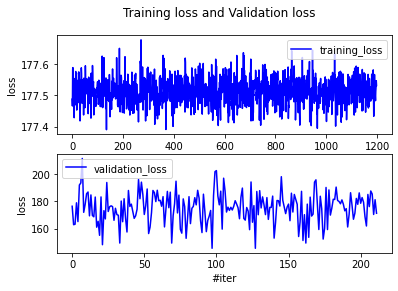

In [24]:
# Plot loss curves
%matplotlib inline
trainer.plot_loss()

In [25]:
  #=====================test============================
trainer.test()

215/216of test, loss=213.99835205078125

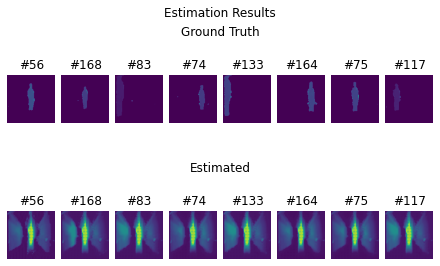

In [26]:
%matplotlib inline

trainer.plot_test_results()

In [124]:
torch.save(trainer.model.state_dict(),
           '../Models/v01b3+0317make01+ep100.pth')